In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys

sys.path.insert(1, "../")

In [4]:
import utils.us_map
import utils.scores as score

states = utils.us_map.main("../data/cb_2018_us_state_500k")

In [5]:
paths = ["../data/naep/NDECoreExcel_Reading, Grade 8, All students_20250815065213.xlsx",
         "../data/naep/NDECoreExcel_Reading, Grade 4, All students_20250815065450.xlsx",
         "../data/naep/NDECoreExcel_Mathematics, Grade 8, All students_20250815065004.xlsx",
         "../data/naep/NDECoreExcel_Mathematics, Grade 4, All students_20250815065347.xlsx"]

naep_scores = score.Scores()
for path in paths:
    naep_scores = naep_scores.merge(score.NAEPScores(path))

naep_scores.df

,year,location,mean,section
0,2024,National,258.049834,Reading_8
1,2024,Alabama,249.600097,Reading_8
2,2024,Alaska,246.448912,Reading_8
3,2024,Arizona,254.343066,Reading_8
4,2024,Arkansas,254.774995,Reading_8
...,...,...,...,...
319,2013,Virginia,246.177457,Mathematics_4
320,2013,Washington,246.288338,Mathematics_4
321,2013,West Virginia,237.440633,Mathematics_4
322,2013,Wisconsin,244.706292,Mathematics_4


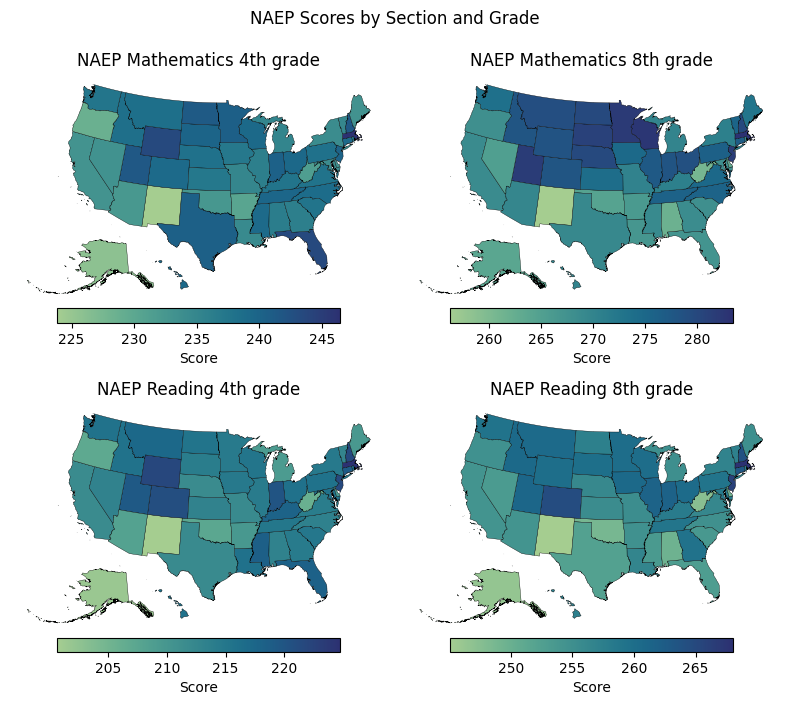

In [6]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8), layout="tight")
axes = axes.flatten()
[ax.set_axis_off() for ax in axes]
min_value = naep_scores.get_year(2024).df["mean"].min()
max_value = naep_scores.get_year(2024).df["mean"].max()

for section, ax in zip(sorted(naep_scores.df["section"].unique()), axes):
    df = naep_scores.get_year(2024).get_section(section).df
    label = "NAEP " + " ".join(section.split("_")) + "th grade"
    ax.set_title(f"{label}")
    map = (states.merge(df,
                        right_on="location", left_on="NAME")
           .plot(column="mean",
                 cmap="crest",
                 legend=True,
                 edgecolor="black",
                 lw=0.25,
                 legend_kwds={"label": "Score",
                              "shrink": 0.75,
                              "orientation": "horizontal",
                              "pad": 0.01
                              },
                 ax=ax))

fig.suptitle("NAEP Scores by Section and Grade", y=0.88)
plt.show()

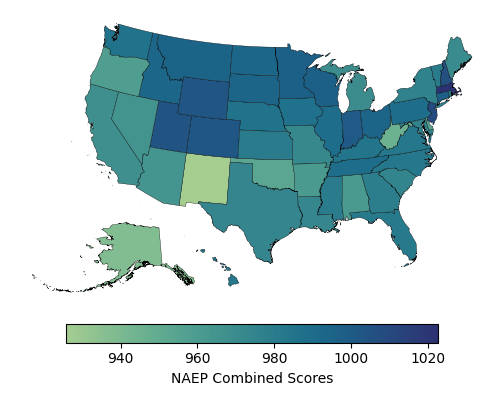

In [7]:
combined_scores_df = naep_scores.df.groupby(
    ["year", "location"]).agg(total=("mean", "sum")).reset_index()

(states.merge(combined_scores_df.query("year==2024"),
              left_on="NAME",
              right_on="location")
 .plot(column="total",
       cmap="crest",
       legend=True,
       edgecolor="black",
       lw=0.25,
       legend_kwds={"label": "NAEP Combined Scores",
                    "shrink": 0.75,
                    "orientation": "horizontal",
                    "pad": 0.05
                    })
 )

plt.axis("off")
plt.show()

In [8]:
non_states = ["DoDEA", "Puerto Rico", "District of Columbia", "National"]

rankings = (combined_scores_df.query("location not in @non_states")
            .pivot_table(index="location", columns="year", values="total")
            .sort_values(2024, ascending=False)
            .reset_index()
            )

rankings.columns.name = "2024 Rankings"
rankings.index = rankings.index + 1
rankings.round(1)

2024 Rankings,location,2013,2015,2017,2019,2022,2024
1,Massachusetts,1063.0,1057.2,1059.6,1046.0,1020.9,1022.7
2,New Jersey,1048.0,1039.1,1047.5,1035.3,1012.6,1009.4
3,New Hampshire,1055.0,1050.3,1042.3,1024.0,1003.7,1006.7
4,Utah,1020.0,1024.3,1023.2,1021.3,1008.1,1003.9
5,Wyoming,1031.5,1030.4,1032.4,1023.5,1009.6,1003.6
6,Colorado,1034.3,1019.2,1022.0,1018.7,997.6,1002.7
7,Indiana,1029.0,1030.4,1032.7,1018.3,995.7,1000.3
8,Connecticut,1032.7,1026.1,1024.3,1023.5,995.8,998.0
9,Wisconsin,1021.8,1025.3,1017.5,1017.4,1001.0,997.3
10,Minnesota,1046.1,1037.3,1035.9,1025.4,995.0,997.3
